# Agriculture Commodities, Prices & Seasons 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Load and view data

In [3]:
monthly_cmo_data = "Monthly_data_cmo.csv"
monthly_cmo_df = pd.read_csv(monthly_cmo_data)

In [4]:
monthly_cmo_df.columns

Index(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl', 'min_price',
       'max_price', 'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

Variable description:
* msprice- Minimum Support Price
* arrivals_in_qtl- Quantity arrival in market (in quintal)
* min_price- Minimum price charged per quintal
* max_price- Maximum price charged per quintal
* modal_price- Mode (Average) price charged per quintal


In [5]:
monthly_cmo_df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [6]:
monthly_cmo_df.tail()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra
62428,Shrigonda,SUNFLOWER,2016,November,74,2933,3200,3067,2016-11,Ahmadnagar,Maharashtra


At first glance the data doesn't seems organised by date.

Let's see if data has missing values, and type of each column

In [7]:
monthly_cmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


Basic statistical information about data

In [8]:
monthly_cmo_df.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


Let's dig in data some deeper

In [9]:
monthly_cmo_df.Year.unique()

array([2015, 2016, 2014])

In [10]:
monthly_cmo_df.APMC.value_counts()

Mumbai                    1538
Pune                      1513
Nagpur                    1340
Barshi                    1076
Jalgaon                   1055
Solapur                    984
Kamthi                     967
Shrirampur                 947
Kalyan                     932
Pune-Manjri                930
Aurangabad                 918
Rahata                     848
Karad                      831
Amarawati                  817
Kolhapur                   816
Nashik                     750
Pune-Pimpri                681
Ahmednagar                 649
Ramtek                     621
Satara                     549
Akluj                      542
Osmanabad                  510
Sangali                    462
Ratanagari                 457
Manchar                    455
Chandrapur-Ganjwad         454
Dhule                      434
Vadgaon Peth               415
Kalmeshwar                 415
Kalamb (Os)                407
                          ... 
Lakhani                     13
Shirala 

In [11]:
monthly_cmo_df.Commodity.value_counts()

Gram                     3972
Wheat(Husked)            3946
Sorgum(Jawar)            3560
Soybean                  3545
Pigeon Pea (Tur)         3389
Maize                    2422
Green Gram               2294
Bajri                    2250
Onion                    1796
Black Gram               1557
Ground Nut Pods (Dry)    1045
Cotton                    990
Tomato                    975
Brinjal                   961
Ladies Finger             877
Paddy-Unhusked            870
Cabbage                   851
Green Chilli              802
Cucumber                  797
Flower                    784
Bitter Gourd              784
Potato                    687
Cluster Bean              664
Rice(Paddy-Hus)           640
Capsicum                  625
Bottle Gourd              570
Garlic                    557
Pomegranate               539
Sesamum                   526
Ginger (Fresh)            496
                         ... 
SHEEP                       1
CASTOR SEED                 1
JACK FRUIT

### Data Cleaning

*We can see we have some commodities name in uppercase and some in lowercase*. Convert all this to lowercase to find if there is any duplicates

In [12]:
len(monthly_cmo_df.Commodity.unique())

352

In [13]:
# lower case all entries of commodity
monthly_cmo_df.Commodity = monthly_cmo_df.Commodity.str.lower()

In [14]:
len(monthly_cmo_df.Commodity.unique())

204

**Wow unique values dropped from 352 to 204** We can do even better lets remove leading and trailing whitespaces

In [15]:
monthly_cmo_df.Commodity = monthly_cmo_df.Commodity.str.strip()
len(monthly_cmo_df.Commodity.unique())

202

2 more duplicate values removed

We can see there is some extra spaces in between words, let's try to remove them.

In [16]:
monthly_cmo_df.Commodity = monthly_cmo_df.Commodity.str.replace(' +', '')
len(monthly_cmo_df.Commodity.unique())

201

**Looks like we have handles all redundant names** Let's take a look at all 201 elements of Comodity column to see if anything else id wrong !

In [17]:
monthly_cmo_df.Commodity.unique()

array(['bajri', 'wheat(husked)', 'sorgum(jawar)', 'maize', 'gram',
       'horsegram', 'matki', 'pigeonpea(tur)', 'blackgram', 'castorseed',
       'soybean', 'jaggery', 'lemon', 'ginger(fresh)', 'potato',
       'ladiesfinger', 'flower', 'carrot', 'clusterbean', 'ghevda',
       'ghosali(bhaji)', 'mango(raw)', 'cucumber', 'onion', 'bittergourd',
       'cabbage', 'garlic', 'math(bhaji)', 'capsicum', 'tomato',
       'brinjal', 'tamarind', 'tamarindseed', 'coriander(dry)',
       'greenchilli', 'chillies(red)', 'mustard', 'paddy-unhusked',
       'hilda', 'chikoo', 'cotton', 'groundnutpods(dry)', 'pomegranate',
       'papai', 'melon', 'beetroot', 'bottlegourd', 'dhemse', 'coriander',
       'spinach', 'shevga', 'smallgourd', 'grapes', 'kharbuj',
       'greengram', 'sunflower', 'safflower', 'mango', 'watermelon',
       'mosambi', 'orange', 'fenugreek', 'cowpea', 'greenpeas(dry)',
       'squashgourd', 'maize(corn.)', 'chino', 'curryleaves',
       'sweetpotato', 'walvad', 'rice(paddy

**Looks good**, We have cleaned Commodity column succesfully

Now lets dig some deeper in APMC column to see if it also has redundant data

In [18]:
len(monthly_cmo_df.APMC.unique())

349

In [19]:
len(monthly_cmo_df.APMC.str.lower().str.strip().str.replace(' +', '').unique())

349

It don't has redundant data, so lets leave this column as it is

In [20]:
sorted(monthly_cmo_df.date.unique()), monthly_cmo_df.date.describe()

(['2014-09',
  '2014-10',
  '2014-11',
  '2014-12',
  '2015-01',
  '2015-02',
  '2015-03',
  '2015-04',
  '2015-05',
  '2015-06',
  '2015-07',
  '2015-08',
  '2015-09',
  '2015-10',
  '2015-11',
  '2015-12',
  '2016-01',
  '2016-02',
  '2016-03',
  '2016-04',
  '2016-05',
  '2016-06',
  '2016-07',
  '2016-08',
  '2016-09',
  '2016-10',
  '2016-11'],
 count       62429
 unique         27
 top       2016-01
 freq         2769
 Name: date, dtype: object)

We have data from September 2014 to November 2016, a period of 27 months

Now see `district_name` for any unwanted things

In [21]:
monthly_cmo_df.district_name.unique(), monthly_cmo_df.district_name.describe()

(array(['Ahmadnagar', 'Akola', 'Amaravathi', 'Aurangabad', 'Beed',
        'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli',
        'Gondiya', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
        'Mumbai', 'Nagpur', 'Nanded', 'Nandurbar', 'Nasik', 'Osmanabad',
        'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli', 'Satara',
        'Solapur', 'Thane', 'Wardha', 'Wasim', 'Yewatmal'], dtype=object),
 count     62429
 unique       33
 top        Pune
 freq       6366
 Name: district_name, dtype: object)

In [22]:
monthly_cmo_df.state_name.describe()

count           62429
unique              1
top       Maharashtra
freq            62429
Name: state_name, dtype: object

**As we are going to do time-series analysis we will convert date to `datetime` object** 

In [23]:
monthly_cmo_df.date = pd.to_datetime(monthly_cmo_df.date, format='%Y-%m')
monthly_cmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null datetime64[ns]
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 5.2+ MB


In [24]:
monthly_cmo_df.index = monthly_cmo_df.date
monthly_cmo_df = monthly_cmo_df.sort_index()
monthly_cmo_df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
date,,,,,,,,,,,
2014-09-01,Kurdwadi,sorgum(jawar),2014,September,454,1353,2610,1981,2014-09-01,Solapur,Maharashtra
2014-09-01,Satara,ladiesfinger,2014,September,128,2435,3261,2848,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,potato,2014,September,2988,2175,2488,2331,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,ginger(fresh),2014,September,199,3438,4813,4125,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,groundnutpods(dry),2014,September,1,3000,4000,3500,2014-09-01,Satara,Maharashtra


In [25]:
monthly_cmo_df_clean = monthly_cmo_df.drop(['Year', 'Month', 'date'], axis=1)

Let's save the data after removing redundancy

In [26]:
monthly_cmo_df_clean.to_csv('monthly_cmo_data_cleaned.csv')

### Detecting and Removing Outliers

Now we dectect outliers in our data and filter them.

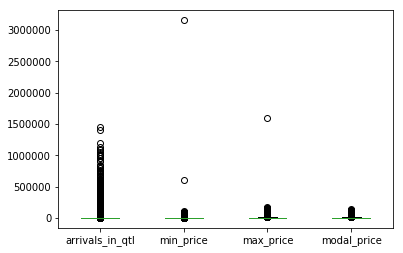

In [27]:
monthly_cmo_df_clean.plot(kind='box')

Let's see which commodities are genrally in outliers. It will give us an idea if the outliers are genuine or they are because of some human/typing error

In [28]:
q = monthly_cmo_df_clean.arrivals_in_qtl.quantile(0.99)
print(monthly_cmo_df_clean[monthly_cmo_df_clean.arrivals_in_qtl > q].Commodity.describe())
print(monthly_cmo_df_clean[monthly_cmo_df_clean.arrivals_in_qtl > q].Commodity.unique())

count       625
unique       25
top       onion
freq        302
Name: Commodity, dtype: object
['onion' 'potato' 'coconut' 'wheat(husked)' 'rice(paddy-hus)' 'mosambi'
 'shepu' 'coriander' 'methi(bhaji)' 'tomato' 'apple' 'sugar' 'orange'
 'soybean' 'banana' 'cotton' 'math(bhaji)' 'jaggery' 'pigeonpea(tur)'
 'watermelon' 'mango' 'turmeric' 'flower' 'maize' 'melon']


We can see some Commodities are outliers just because they have more demand ie. Oninon, Potato, etc. We should not filter them. *Instead the better approch would be to find outlier in each commodity*

#### Filtering Outliers

We will filter outliers which are 3 IRQ away from 25th and 75 percentile. We have left suspected outliers because after some analysis It looked like they were real data.

we may test other method for filtering outlier later, like *FFT filtering*.

In [29]:
# filter outliers from selected columns, remove those rows which contain outlier
def remove_outlier(df_in, column):
    q1 = df_in[column].quantile(0.25)
    q3 = df_in[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[column] > fence_low) & (df_in[column] < fence_high)]
    return df_out

In [30]:
# filter data for outliers
cols = ['arrivals_in_qtl', 'min_price', 'max_price', 'modal_price']
df_in =  monthly_cmo_df_clean
for col in cols:
    df_out = df_in.groupby('Commodity').apply(remove_outlier, col)
    df_out.index = df_out.index.droplevel('Commodity')
    df_in = df_out
    
df_filtered = df_in
df_filtered.sort_index().to_csv('monthly_cmo_filtered.csv')

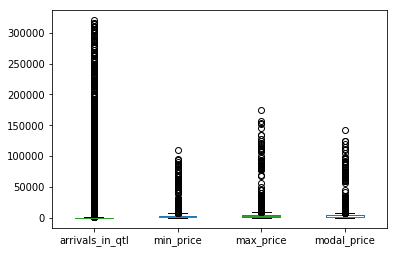

In [31]:
df_filtered.plot(kind='box')

In [32]:
df_filtered.describe()
# print(monthly_cmo_df_clean[df_filtered.arrivals_in_qtl > q].Commodity.describe())
# print(monthly_cmo_df_clean[df_filtered.arrivals_in_qtl > q].Commodity.unique())

,arrivals_in_qtl,min_price,max_price,modal_price
count,55546.000000,55546.000000,55546.000000,55546.000000
mean,2859.060976,2883.479404,3608.449123,3265.666025
std,16167.906361,3033.748981,4164.385879,3563.506520
min,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1260.000000,1597.000000,1451.000000
50%,155.000000,1966.500000,2750.000000,2396.000000
75%,752.000000,3884.000000,4576.750000,4214.000000
max,319889.000000,110313.000000,174375.000000,142344.000000


Let's plot some line plot to see how outlier filtering has affected our data. We can do that by plotting data before and after filtering outlier. After ploting data we can see nature of plot has not changed much.

*We can also see that some spikes in curve is reduced but where outlier is detected in one row of one column, whole row gets deleted we should interpolate instead of removing whole row*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e3485c2b0>,
      dtype=object)

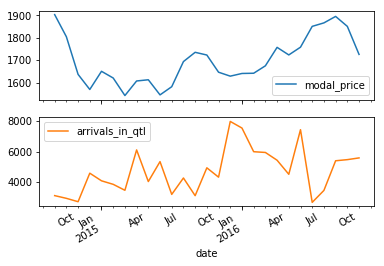

In [33]:
mask = (df_filtered["Commodity"] == "paddy-unhusked")
df_filtered.loc[mask, ["modal_price", 'arrivals_in_qtl']].resample('M').mean().plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e348d7080>,
      dtype=object)

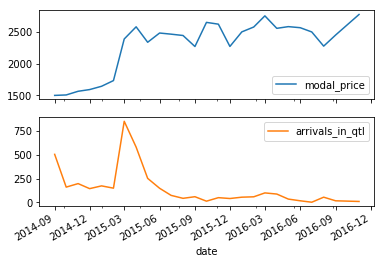

In [34]:
mask = (monthly_cmo_df_clean["Commodity"] == "wheat(husked)") & (monthly_cmo_df_clean["APMC"]=='Ausa')
monthly_cmo_df_clean.loc[mask, ["modal_price", 'arrivals_in_qtl']].plot(subplots=True)
# df_filtered.loc[mask, ['arrivals_in_qtl']].resample('M').mean().plot()

### Trends and Seasonality in Time Series Data

Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable change or pattern in a time series that recurs or repeats over a period can be said to be seasonal.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e346d1320>,
      dtype=object)

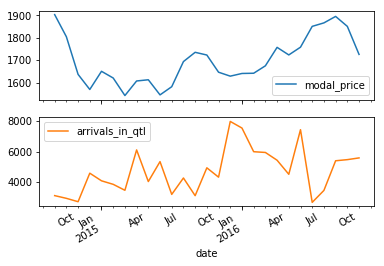

In [35]:
mask = (df_filtered["Commodity"] == "paddy-unhusked")
df_filtered.loc[mask, ["modal_price", 'arrivals_in_qtl']].resample('M').mean().plot(subplots=True)

We can see some seasonality in *paddy-unhusked*. We do seasonal decompositon to remove noise and levels.

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

Seasonality:  [<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e29cf0d68>


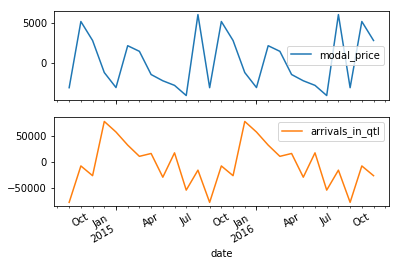

In [38]:
result = seasonal_decompose(df_filtered.query('Commodity == "paddy-unhusked"').groupby("date").sum()[["modal_price", 'arrivals_in_qtl']], model='additive')
print("Seasonality: ",result.seasonal.plot(subplots=True))

We can see seasonal patterns `modal_price` as well as `arrivals_in_qtl`. We can see when arrivals are maximum, price are lower and vice versa.

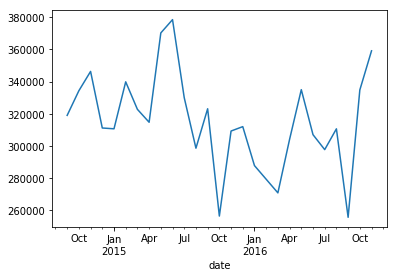

In [39]:
df_filtered.query('APMC == "Mumbai"').resample('M').sum().modal_price.plot()

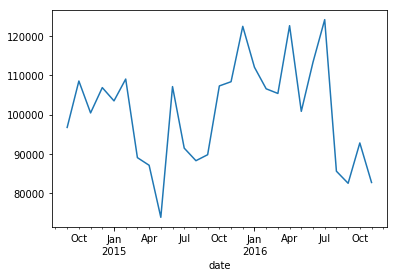

In [40]:
df_filtered.query('APMC == "Jalgaon"').resample('M').sum().modal_price.plot()

We can see there is *Additive* seasonality in data in cases we observed above. So we can infer that seasonality is additive in most of cases

Now Lets decmpose seasonality.

Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


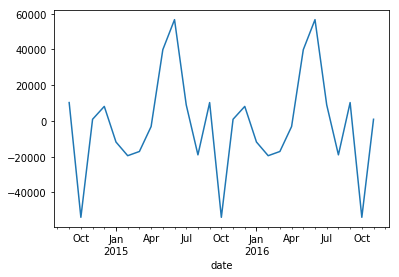

In [41]:
result = seasonal_decompose(df_filtered.query('APMC == "Mumbai"').resample('M').sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


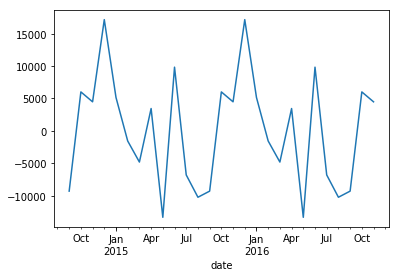

In [42]:
# we can also use groupby instead of resample
result = seasonal_decompose(df_filtered.query('APMC == "Jalgaon"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

Let's also load other `csv` file and view it

In [43]:
monthly_cmo_df_clean.loc[monthly_cmo_df_clean.arrivals_in_qtl>monthly_cmo_df_clean.arrivals_in_qtl.quantile(0.99)].Commodity.describe()

count       625
unique       25
top       onion
freq        302
Name: Commodity, dtype: object

In [44]:
df_filtered.loc[df_filtered.arrivals_in_qtl>df_filtered.arrivals_in_qtl.quantile(0.99)].Commodity.unique()

array(['bedana', 'coconut', 'cotton', 'onion', 'spiltpigeonpea', 'sugar'],
      dtype=object)

In [45]:
cmo_msp = 'CMO_MSP_Mandi.csv'
cmo_msp_df = pd.read_csv(cmo_msp)

In [46]:
cmo_msp_df.columns

Index(['commodity', 'year', 'Type', 'msprice', 'msp_filter'], dtype='object')

In [47]:
cmo_msp_df.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [48]:
cmo_msp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


Here we can see we have misiing values in `cmo_msp_df`. `msprice` has 10 values missing.

In [49]:
cmo_msp_df.year.unique(), cmo_msp_df.Type.unique(), cmo_msp_df.commodity.unique(), cmo_msp_df.msp_filter.unique()

(array([2012, 2013, 2014, 2015, 2016]),
 array(['Kharif Crops', 'Rabi Crops', 'Other Crops'], dtype=object),
 array(['PADDY-UNHUSKED', 'RICE(PADDY-HUS)', 'Jowar_Hybrid',
        'SORGUM(JAWAR)', 'BAJRI', 'MAIZE', 'Ragi_Maldandi',
        'PIGEON PEA (TUR)', 'SPILT GERRN GRAM', 'SPLIT BLACK GRAM',
        'COTTON', 'Cotton_Long Staple', 'GR.NUT KERNELS', 'SUNFLOWER',
        'Soyabean_Black', 'SOYABEAN', 'SESAMUM', 'NIGER-SEED',
        'WHEAT(HUSKED)', 'WHEAT(UNHUSKED)', 'BARLI', 'Gram_Yellow',
        'Masur_Yellow', 'MUSTARD', 'SAFFLOWER', 'Toria_Yellow',
        'Copra (Milling)_Yellow', 'Copra (Ball)_Yellow', 'COCONUT',
        'Jute_Yellow', 'SUGAR-CANE', 'SUGARCANE'], dtype=object),
 array([1]))